# Housing Analysis
May 2022
Median Sale Price
Single Family home and condos 
By week

Zillow Data
https://datastud.dev/posts/python-seasonality-how-to

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from datetime import date
import seaborn as sns

In [65]:
data_orig = pd.read_csv('Metro_median_sale_price_uc_sfrcondo_sm_sa_week_data.csv')

In [66]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Week         529 non-null    object
 1   Median Sale  529 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [67]:
data_orig = data_orig.astype({"Week": 'datetime64[ns]'})

In [68]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Week         529 non-null    datetime64[ns]
 1   Median Sale  529 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.4 KB


C:\Users\Joe\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median Sale', ylabel='Density'>

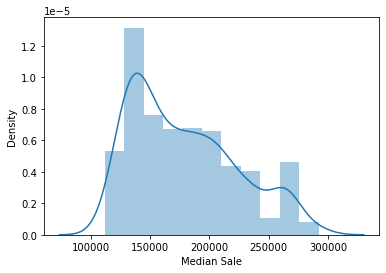

In [69]:
sns.distplot(data_orig["Median Sale"])

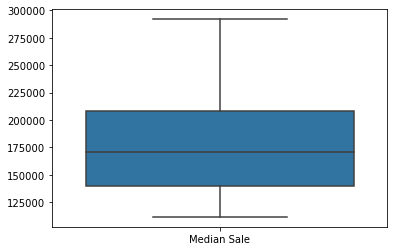

In [70]:
vis5 = sns.boxplot(data = data_orig)

In [71]:
data_orig.Week.describe(datetime_is_numeric=True)

count                    529
mean     2017-03-11 00:00:00
min      2012-02-18 00:00:00
25%      2014-08-30 00:00:00
50%      2017-03-11 00:00:00
75%      2019-09-21 00:00:00
max      2022-04-02 00:00:00
Name: Week, dtype: object

In [72]:
data_orig["Median Sale"].describe()

count       529.000000
mean     178763.724008
std       44533.725270
min      111678.000000
25%      139512.000000
50%      171047.000000
75%      208390.000000
max      291983.000000
Name: Median Sale, dtype: float64

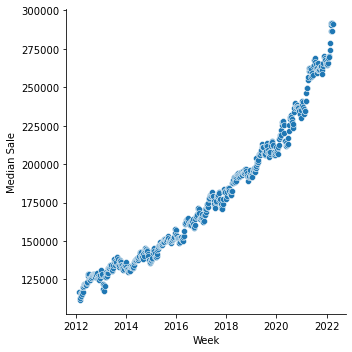

In [73]:
sns.relplot(data=data_orig, x="Week", y="Median Sale")

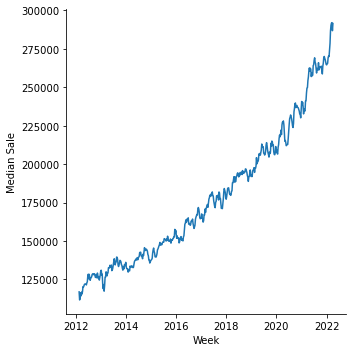

In [74]:
sns.relplot(kind="line", data=data_orig, x="Week", y="Median Sale")

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
def set_date_index(input_df, col_name='Date'):
    """Given a pandas df, parse and set date column to index.
        col_name will be removed and set as datetime index.

    Args:
        input_df (pandas dataframe): Original pandas dataframe
        col_name (string): Name of date column

    Returns:
        pandas dataframe: modified and sorted dataframe
    """
    # Copy df to prevent changing original
    modified_df = input_df.copy()

    # Infer datetime from col
    modified_df[col_name] = pd.to_datetime(modified_df[col_name])

    # Sort and set index
    modified_df.sort_values(col_name, inplace=True)
    modified_df.set_index(col_name, inplace=True)

    return modified_df

In [77]:
data_orig= set_date_index(data_orig, "Week") # custom helper function

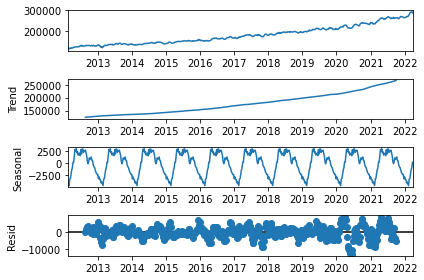

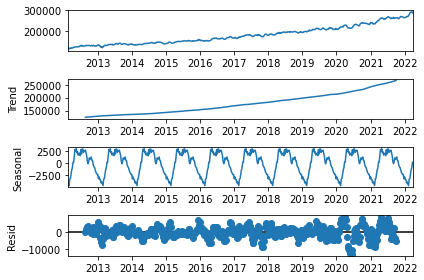

In [78]:
# Reproduce the example in OP
seasonal_decompose(data_orig, model='additive', period=52).plot()

### Median values are lower in the first few months of the year every year since 2012

### Median home values have only increased since 2012 almost linearly

### There's a $10k median value error swing possible since mid-2020